In [1]:
import pandas as pd
import librosa
from matplotlib import pyplot as plt
import numpy as np


PATH_TO_INPUT_DATA = "/Users/simonmyhre/workdir/gitdir/sqml/projects/sm_multiclass_masters_project/pull_data/cache/datav3"
df = pd.read_csv(PATH_TO_INPUT_DATA + "/data.csv")

print(df.head(5))


                        sqbundle_id  wav_duration_sec  label_duration_sec  \
0  32500921bfa969d37d0b36240f8e59d8         24.422369           24.422369   
1  340dd60b47d2e8d17d4ab6f7c81684f9         75.401442           38.190698   
2  340dd60b47d2e8d17d4ab6f7c81684f9         75.401442           36.195621   
3  340dd60b47d2e8d17d4ab6f7c81684f9         75.401442            1.015123   
4  399328d9efc94ec8cba799ffcaac4eec         36.592857           36.592857   

   label_relative_start_sec  label_relative_end_sec                label  \
0                  0.000000               24.422369  electric_quad_drone   
1                  0.000000               38.190698  electric_quad_drone   
2                 38.190698               74.386319  electric_quad_drone   
3                 74.386319               75.401442  electric_quad_drone   
4                  0.000000               36.592857  electric_quad_drone   

                              file_name  
0  b38b70ca19ee224c3ba056f0de71de2b.wa

In [2]:
# Get the unique labels
labels = df["label"].unique()
labels

array(['electric_quad_drone', 'racing_drone', 'electric_fixedwing_drone',
       'petrol_fixedwing_drone', 'dvc_non_drone', 'animal', 'speech',
       'TUT_dcase', 'nature_chernobyl'], dtype=object)

In [3]:
"""Utils"""
def load_wav_file(filename, target_sr=44100, window_size=None, window_start=None):
    wav, sr = librosa.load(
                    PATH_TO_INPUT_DATA + "/wavs/" + filename , sr=target_sr)
    
    if window_size is not None and window_start is not None:
        start_frame = int(window_start * sr)
        end_frame = int((window_start + window_size) * sr)
        wav = wav[start_frame:end_frame]

    return wav, sr

def to_log_mel_spectrogram(wav: np.ndarray, sample_rate: int, n_mels: int = 512, n_fft: int = 4096, hop_length: int = 512, fmin: int = None, fmax: int = None):
        if fmin is None and fmax is None:
            mel_spectrogram = librosa.feature.melspectrogram(
                y=wav,
                sr=sample_rate,
                n_mels=n_mels,
                n_fft=n_fft,
                hop_length=hop_length,
            )
        elif fmin is not None and fmax is None:
            mel_spectrogram = librosa.feature.melspectrogram(
                y=wav,
                sr=sample_rate,
                n_mels=n_mels,
                n_fft=n_fft,
                hop_length=hop_length,
                fmin=fmin,
            )
        elif fmin is None and fmax is not None:
            mel_spectrogram = librosa.feature.melspectrogram(
                y=wav,
                sr=sample_rate,
                n_mels=n_mels,
                n_fft=n_fft,
                hop_length=hop_length,
                fmax=fmax,
            )
        else:
            mel_spectrogram = librosa.feature.melspectrogram(
                y=wav,
                sr=sample_rate,
                n_mels=n_mels,
                n_fft=n_fft,
                hop_length=hop_length,
                fmin=fmin,
                fmax=fmax,
            )
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        return log_mel_spectrogram

def plot_spectrogram(spectrogram, sr, save_name = None):
    fig = plt.figure()
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    if save_name:
        fig.tight_layout()
        fig.savefig(save_name, bbox_inches='tight')


def normalize_audio_energy(audio, target_energy=1.0):
    current_energy = np.sum(np.square(audio))
    normalization_factor = np.sqrt(target_energy / (current_energy + 1e-10))
    normalized_audio = audio * normalization_factor

    return normalized_audio



    

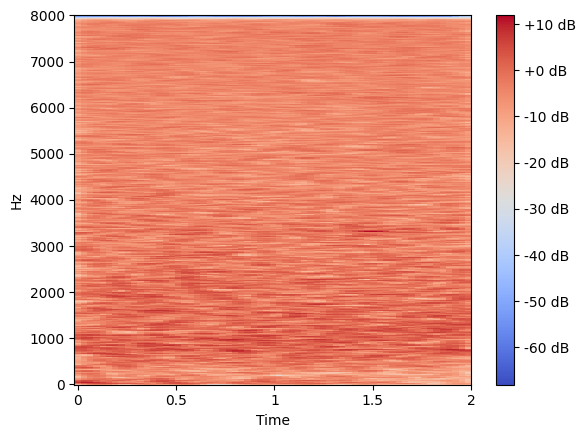

In [4]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "nature_chernobyl"]["file_name"].values[0]
wav, sr = load_wav_file(filename, 16000, 2, 1)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectogram_nature.png")


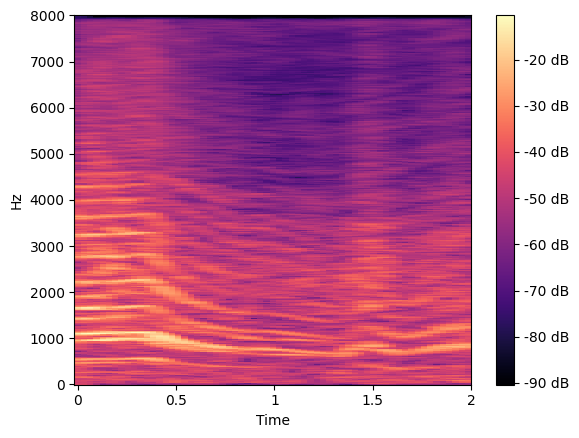

In [5]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[200]
wav, sr = load_wav_file(filename, 16000, 2, 1)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectogram_electric_quad_drone.png")


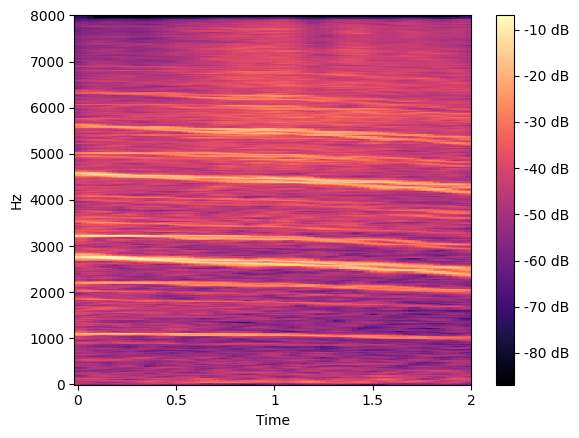

In [6]:
filename = df[df["label"] == "racing_drone"]["file_name"].values[0]
wav, sr = load_wav_file(filename, 16000, 2, 11)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_racing_drone.png")

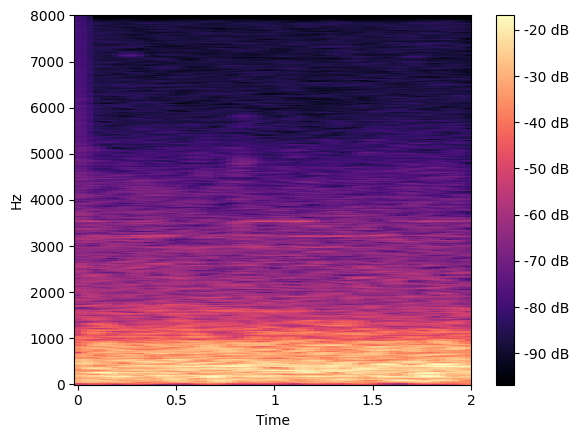

In [7]:
filename = df[df["label"] == "electric_fixedwing_drone"]["file_name"].values[1]
wav, sr = load_wav_file(filename, 16000, 2, 3)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_electric_fixedwing_drone.png")

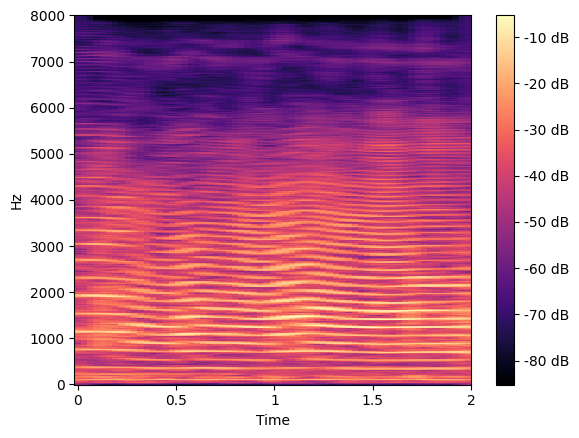

In [8]:
filename = df[df["label"] == "petrol_fixedwing_drone"]["file_name"].values[0]
wav, sr = load_wav_file(filename, 16000, 2, 1)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_petrol_fixedwing_drone.png")

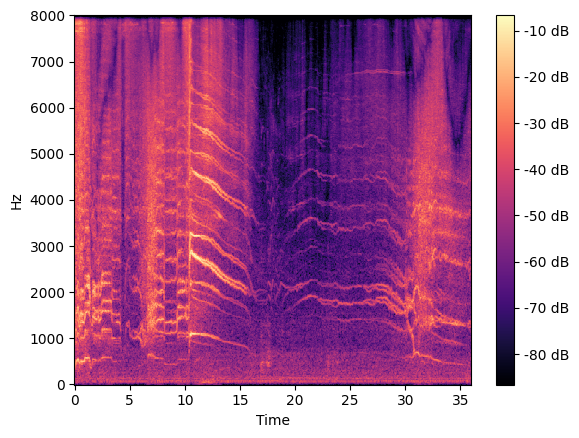

In [9]:
filename = df[df["label"] == "racing_drone"]["file_name"].values[0]
wav, sr = load_wav_file(filename, 16000)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_entire_drone_clip.png")

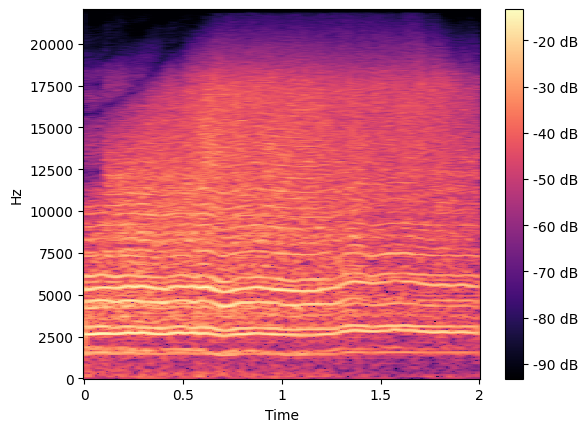

In [10]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[1]
wav, sr = load_wav_file(filename, 44100, 2, 0)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_44100_sr.png")


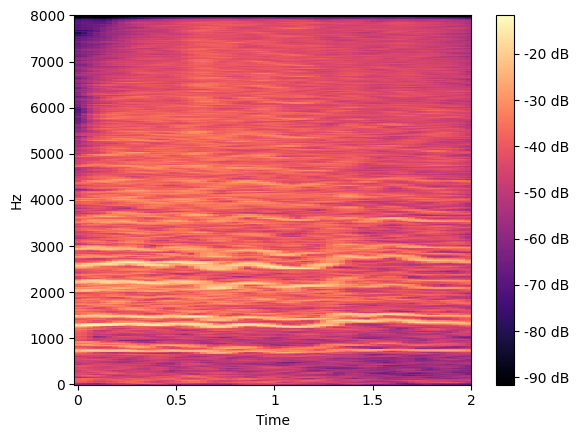

In [11]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[1]
wav, sr = load_wav_file(filename, 16000, 2, 0)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_16000_sr.png")

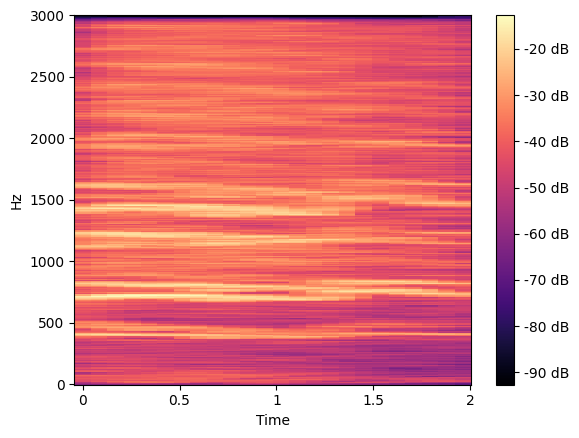

In [12]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[1]
wav, sr = load_wav_file(filename, 6000, 2, 0)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectrogram_6000_sr.png")

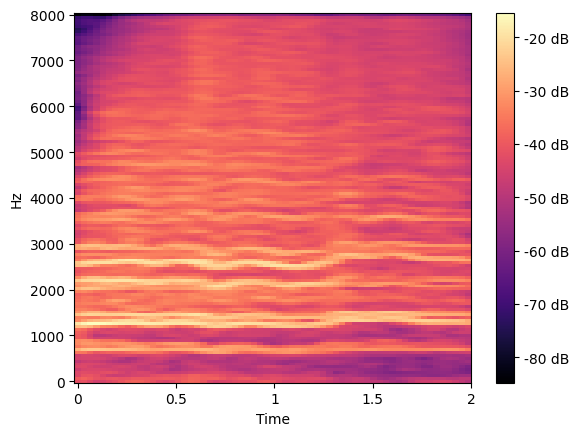

In [13]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[1]
wav, sr = load_wav_file(filename, 16000, 2, 0)
spectrogram = to_log_mel_spectrogram(wav, sr, n_mels=128)
plot_spectrogram(spectrogram, sr, save_name="spectogram_nmels_128.png")

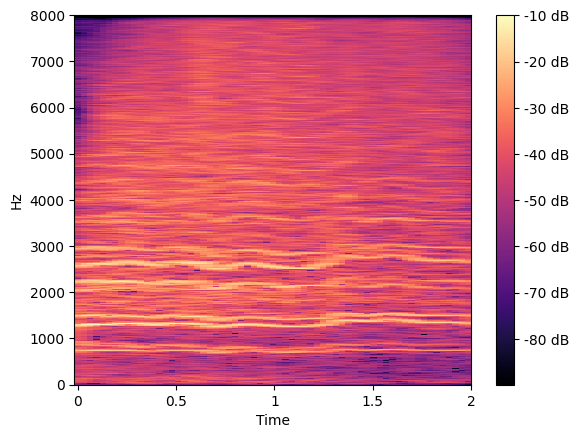

In [14]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[1]
wav, sr = load_wav_file(filename, 16000, 2, 0)
spectrogram = to_log_mel_spectrogram(wav, sr, n_mels=1000)
plot_spectrogram(spectrogram, sr, save_name="spectogram_nmels_1000.png")

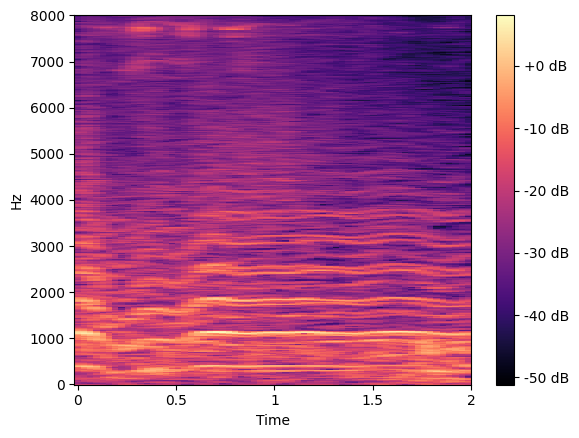

In [15]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, sr, fmin=100, fmax=6000)
plot_spectrogram(spectrogram, sr, save_name="spectogram_internal_normalized_energy.png")

# Augment

In [4]:
PATH_TO_SKYLINE = "/Users/simonmyhre/workdir/gitdir/skyline"
PATH_TO_INPUT_DATA = "/Users/simonmyhre/workdir/gitdir/sqml/projects/sm_multiclass_masters_project/pull_data/cache/datav3"
import sys
sys.path.append(PATH_TO_SKYLINE)
from cirrus.datamaker.augmenter.augmenter import Augmenter
augmenter = Augmenter(path_to_input_data=PATH_TO_INPUT_DATA)

2024-04-12 14:47:06.405626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


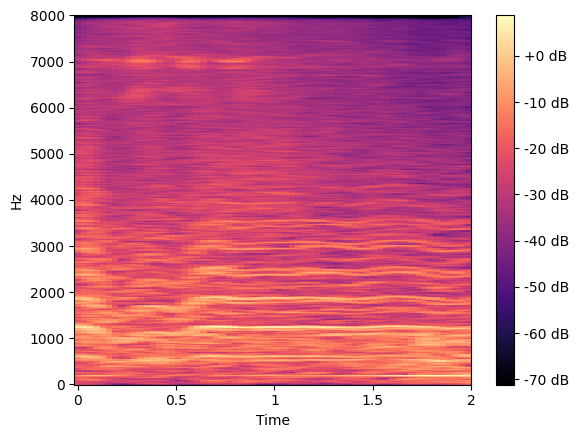

In [5]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, sr)
plot_spectrogram(spectrogram, sr, save_name="spectogram_before_augment.png")


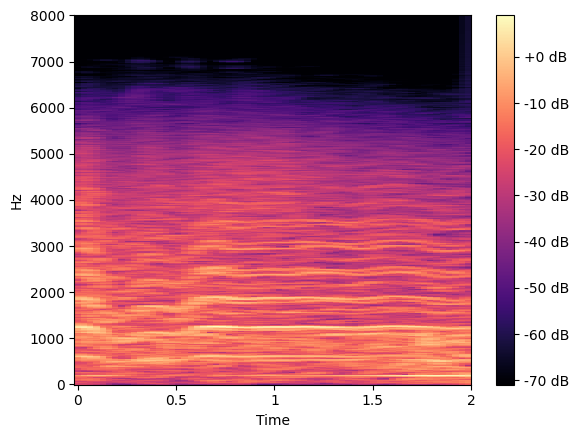

In [70]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
low_pass = augmenter.augment_file(wav, sr, "low_pass")
low_pass_spec = to_log_mel_spectrogram(low_pass, sr)
plot_spectrogram(low_pass_spec, sr, save_name="spectogram_low_pass.png")

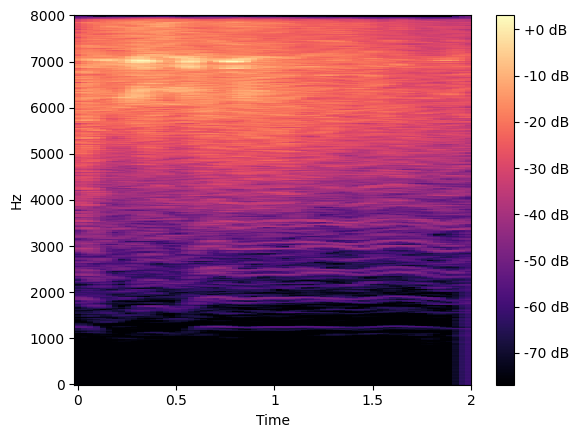

In [7]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
high_pass = augmenter.augment_file(wav, sr, "high_pass")
high_pass_spec = to_log_mel_spectrogram(high_pass, sr)
plot_spectrogram(high_pass_spec, sr, save_name="spectogram_high_pass.png")

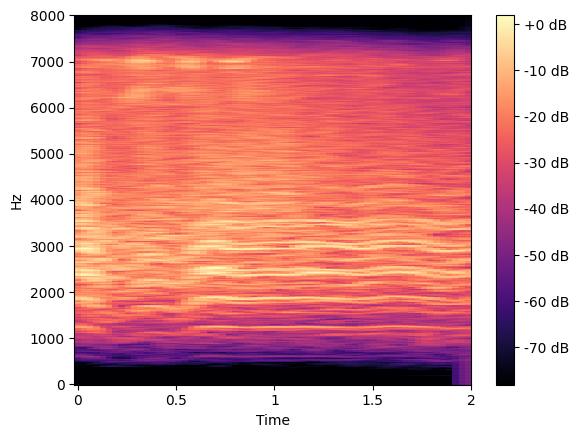

In [66]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
band_pass = augmenter.augment_file(wav, sr, "band_pass")
band_pass_spec = to_log_mel_spectrogram(band_pass, sr)
plot_spectrogram(band_pass_spec, sr, save_name="spectogram_band_pass.png")

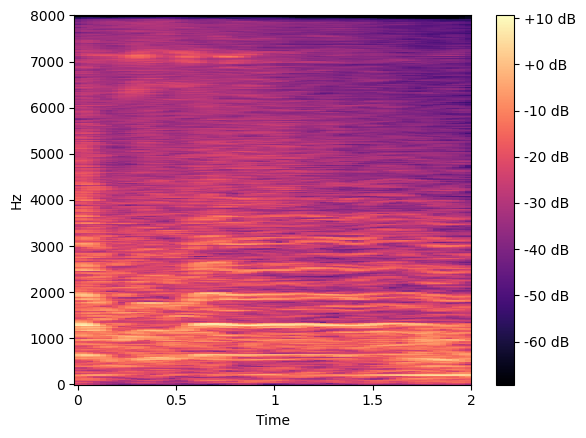

In [19]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
pitch_shift = augmenter.augment_file(wav, sr, "pitch_shift")
pitch_shift_spec = to_log_mel_spectrogram(pitch_shift, sr)
plot_spectrogram(pitch_shift_spec, sr, save_name="spectogram_pitch_shift.png")

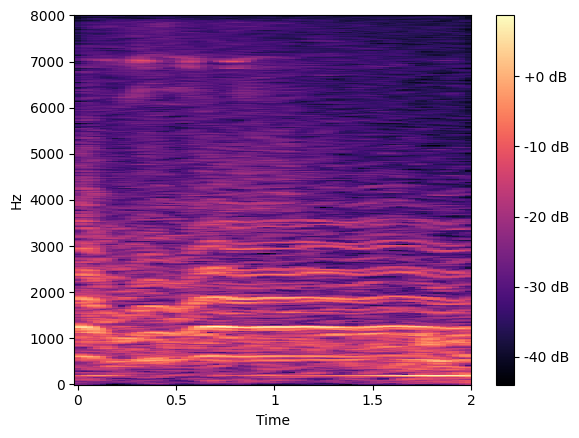

In [10]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
add_noise = augmenter.augment_file(wav, sr, "add_noise")
add_noise_spec = to_log_mel_spectrogram(add_noise, sr)
plot_spectrogram(add_noise_spec, sr, save_name="spectogram_add_noise.png")

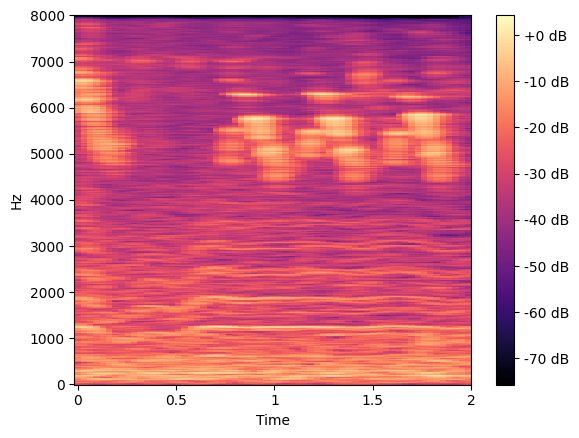

In [20]:
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[5]
wav, sr = load_wav_file(filename, 16000, 2, 0)
mix = augmenter.augment_file(wav, sr, "mix")
mix_spec = to_log_mel_spectrogram(mix, sr)
plot_spectrogram(mix_spec, sr, save_name="spectogram_mix.png")

# Waveform test

In [8]:
import numpy as np
import librosa
from PIL import Image

def create_waveform_image(wav, sr, output_filename):
    # Normalize waveform for better visualization
    normalized_waveform = np.int16((wav / wav.max()) * 32767)

    # Assuming the height of the image you want is 100 pixels
    height = 100
    width = len(normalized_waveform)

    # Create a new image with black background
    img = Image.new('L', (width, height), "black")
    pixels = img.load()

    # Middle of the image
    mid = height // 2

    # Draw waveform
    for x, y in enumerate(normalized_waveform):
        y_pos = mid - int((y / 32768.0) * mid)
        pixels[x, y_pos] = 255  # Color the pixel white

    # Resize image to make it less wide
    img = img.resize((width // 10, height), Image.LANCZOS)  # You can adjust the resizing factor

    # Save the image
    img.save(output_filename)


In [9]:
filename = df[df["label"] == "nature_chernobyl"]["file_name"].values[0]
wav, sr = load_wav_file(filename, 16000, 2, 1)

create_waveform_image(wav, sr, "test.png")